# Import of libraries and config file
In this section the libraries needed in the script are installed and imported. Anyway, some are still imported also later in the script.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from random import sample
from IPython.core.display import display, HTML

# Data loading
from google.colab import drive
from shutil import copyfile
import tarfile

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os, psutil
process = psutil.Process()
print(process.memory_info().rss)

186089472


Connection to Google Drive in order to import the file:

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import of the config file, which contains the paths for importing the files:

In [6]:
import json
with open('/content/gdrive/MyDrive/TextMiningProj_Maugeri_Morelli/Topic modeling/config.json', 'r') as f:
  config = json.load(f)

In [7]:
# Don't print warnings
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [8]:
!pip install top2vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 76.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541973 sha256=bb449b95f353b0c7bdecf900c2abdaaf49984125ce682483916791d85d1fe23b
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=6a7b1f332125003ac47214b788febf91d60a091c6e84986014f18dea8bd58fbc
  Stored in di

# Import of the dataset file
In this section the corpus of documents is imported and the length of the sample is choosen.


In [9]:
texts = pd.read_csv(config["path_texts_preproc_tm"]) 

In [15]:
docs = texts['cleaned_text_clean'][:1000]

In [16]:
docs

0      bishop fargo catholic diocese north dakota exp...
1      ralph mata internal affair lieutenant miamidad...
2      drunk driver killed young woman headon crash c...
3      breezy sweep pen president vladimir putin wrot...
4      fleetwood team still 100 record sky bet league...
                             ...                        
995    anxiety first day andy murray settled comforta...
996    package holiday making comeback family seeking...
997    mexico government trying block execution convi...
998    must every car fan dream might get much sleep ...
999    liverpool manager brendan rodgers felt everton...
Name: cleaned_text_clean, Length: 1000, dtype: object

# Top2Vec

### Fit the model

In [17]:
import numpy as np
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

The Top2Vec model needs as an imput a list of documents, so the variable *docs* is transformed from serie to list.

In [18]:
docs = list(docs)

Fit of the model:

In [19]:
model = Top2Vec(docs)

2023-06-06 20:17:51,810 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2023-06-06 20:17:52,706 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-06-06 20:18:20,852 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-06-06 20:18:34,559 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-06-06 20:18:34,593 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


The fuction *get_num_topics()* returns the total number of detected topics:

In [20]:
model.get_num_topics()

2

The attribute *get_topics* gives as output a tuple of dimension 3:
1.   The first element contains the words associated with each topic;
2.   The second element contains the cosine similarity scores between each word and the topic it is related to;
3. The third element contains the index of the topic.



In [21]:
topics = model.get_topics()
topics

(array([['people', 'many', 'story', 'like', 'anyone', 'life', 'police',
         'added', 'help', 'friend', 'information', 'may', 'someone',
         'person', 'know', 'parent', 'make', 'word', 'came', 'sure',
         'even', 'tell', 'could', 'usually', 'sense', 'door', 'idea',
         'asking', 'nothing', 'went', 'thing', 'soon', 'going',
         'everyone', 'victim', 'putting', 'found', 'others', 'within',
         'told', 'quite', 'several', 'use', 'called', 'individual',
         'actually', 'month', 'speaking', 'check', 'believe'],
        ['scored', 'win', 'scoring', 'striker', 'goal', 'defeat', 'match',
         'champion', 'league', 'player', 'defender', 'score', 'victory',
         'play', 'premier', 'season', 'manager', 'coach', 'chelsea',
         'winning', 'played', 'title', 'winner', 'minute', 'team', 'game',
         'second', 'liverpool', 'performance', 'football', 'ball',
         'point', 'pitch', 'barcelona', 'cup', 'club', 'side', 'draw',
         'forward', 'squ

The following are examples of how to extract information from the object *topics*.

In [22]:
print(type(topics))
print(len(topics))

<class 'tuple'>
3


In [23]:
topics[0][0] #words of the first topic
topics[0][1] #words of the second topic
len(list(topics[0][1])) #50 words for each topic

50

### Evaluation

The *CoherenceModel* function requires the dictionaty of the words in the corpus so we create it here:

In [24]:
docs_in_tokens = [doc.split() for doc in docs]

In [25]:
dictionary = Dictionary(docs_in_tokens)

In [26]:
# Devo creare una lista di liste, dove ogni lista interna contiene le parole in un certo topic (10 parole come nei metodi precedenti)

topic_words = []
for i in range(model.get_num_topics()):
  words = topics[0][i][:10] #parole del primo topic
  topic_words.append(list(words))

print(topic_words)

[['people', 'many', 'story', 'like', 'anyone', 'life', 'police', 'added', 'help', 'friend'], ['scored', 'win', 'scoring', 'striker', 'goal', 'defeat', 'match', 'champion', 'league', 'player']]


In [27]:
#Evaluate
coherence_model = CoherenceModel(topics=topic_words, #lista di liste
                                 texts=docs_in_tokens,  #lista di liste
                                 dictionary=dictionary, #ok
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
coherence

0.6659963430250964

### Search the most similar topic to a given word
The Top2Vec library implements some functions that make very easy searching for similar words and topics. As an example, let's get the topic most similar to the word *football*.

The most similar words to the topic detected:

In [28]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["mexico"], num_topics=1)
topic_words

[array(['people', 'many', 'story', 'like', 'anyone', 'life', 'police',
        'added', 'help', 'friend', 'information', 'may', 'someone',
        'person', 'know', 'parent', 'make', 'word', 'came', 'sure', 'even',
        'tell', 'could', 'usually', 'sense', 'door', 'idea', 'asking',
        'nothing', 'went', 'thing', 'soon', 'going', 'everyone', 'victim',
        'putting', 'found', 'others', 'within', 'told', 'quite', 'several',
        'use', 'called', 'individual', 'actually', 'month', 'speaking',
        'check', 'believe'], dtype='<U11')]

The cosine similarity scores of the words:

In [29]:
word_scores

[array([0.48274726, 0.46623287, 0.46601233, 0.4573583 , 0.4512464 ,
        0.448932  , 0.44438443, 0.43401495, 0.4320023 , 0.43015075,
        0.42954636, 0.4292046 , 0.4273435 , 0.42524624, 0.42320898,
        0.419286  , 0.41696605, 0.41131854, 0.41068023, 0.41038126,
        0.4103163 , 0.41012266, 0.4098219 , 0.40965417, 0.40880445,
        0.40693167, 0.40489218, 0.4045176 , 0.4043054 , 0.4020823 ,
        0.40206233, 0.40105402, 0.40031087, 0.40026024, 0.3994264 ,
        0.3985489 , 0.39764115, 0.39623204, 0.39620435, 0.39577284,
        0.39546353, 0.39505178, 0.39451927, 0.39440843, 0.39368   ,
        0.39160594, 0.39100385, 0.39023435, 0.3902167 , 0.38912544],
       dtype=float32)]

### Average score of the cosine similarity score of the words associated with each topic
Out of curiosity and also to complement the coherence metric evaluation, we computed the mean of the cosine similarity scores of the best 20 words in each topic.

In [30]:
topic_words

[array(['people', 'many', 'story', 'like', 'anyone', 'life', 'police',
        'added', 'help', 'friend', 'information', 'may', 'someone',
        'person', 'know', 'parent', 'make', 'word', 'came', 'sure', 'even',
        'tell', 'could', 'usually', 'sense', 'door', 'idea', 'asking',
        'nothing', 'went', 'thing', 'soon', 'going', 'everyone', 'victim',
        'putting', 'found', 'others', 'within', 'told', 'quite', 'several',
        'use', 'called', 'individual', 'actually', 'month', 'speaking',
        'check', 'believe'], dtype='<U11')]

In [31]:
word_scores

[array([0.48274726, 0.46623287, 0.46601233, 0.4573583 , 0.4512464 ,
        0.448932  , 0.44438443, 0.43401495, 0.4320023 , 0.43015075,
        0.42954636, 0.4292046 , 0.4273435 , 0.42524624, 0.42320898,
        0.419286  , 0.41696605, 0.41131854, 0.41068023, 0.41038126,
        0.4103163 , 0.41012266, 0.4098219 , 0.40965417, 0.40880445,
        0.40693167, 0.40489218, 0.4045176 , 0.4043054 , 0.4020823 ,
        0.40206233, 0.40105402, 0.40031087, 0.40026024, 0.3994264 ,
        0.3985489 , 0.39764115, 0.39623204, 0.39620435, 0.39577284,
        0.39546353, 0.39505178, 0.39451927, 0.39440843, 0.39368   ,
        0.39160594, 0.39100385, 0.39023435, 0.3902167 , 0.38912544],
       dtype=float32)]

While *topic_words* is a list of lists, where the internal lists refer to each topic, *word_scores* is an array.

The following for cycle extracts the score values of the 20 top words in each topic and computes the mean. After, the global mean is calculated, so that, as it takes values between 0 and 1, it gives an idea of the quality of the model.

In [32]:
score_per_topic = []
for i in range(1, model.get_num_topics()+1):
  topic_words, word_scores, topic_nums = model.get_topics(i)
  scores = list(word_scores)[:20]
  score = np.mean(scores)
  score_per_topic.append(score)

np.mean(score_per_topic)

0.46307212

### Wordclouds
The library also implements attributes of the model that makes the representation on the wordcloud of the words in each topic very easy.

As an example,

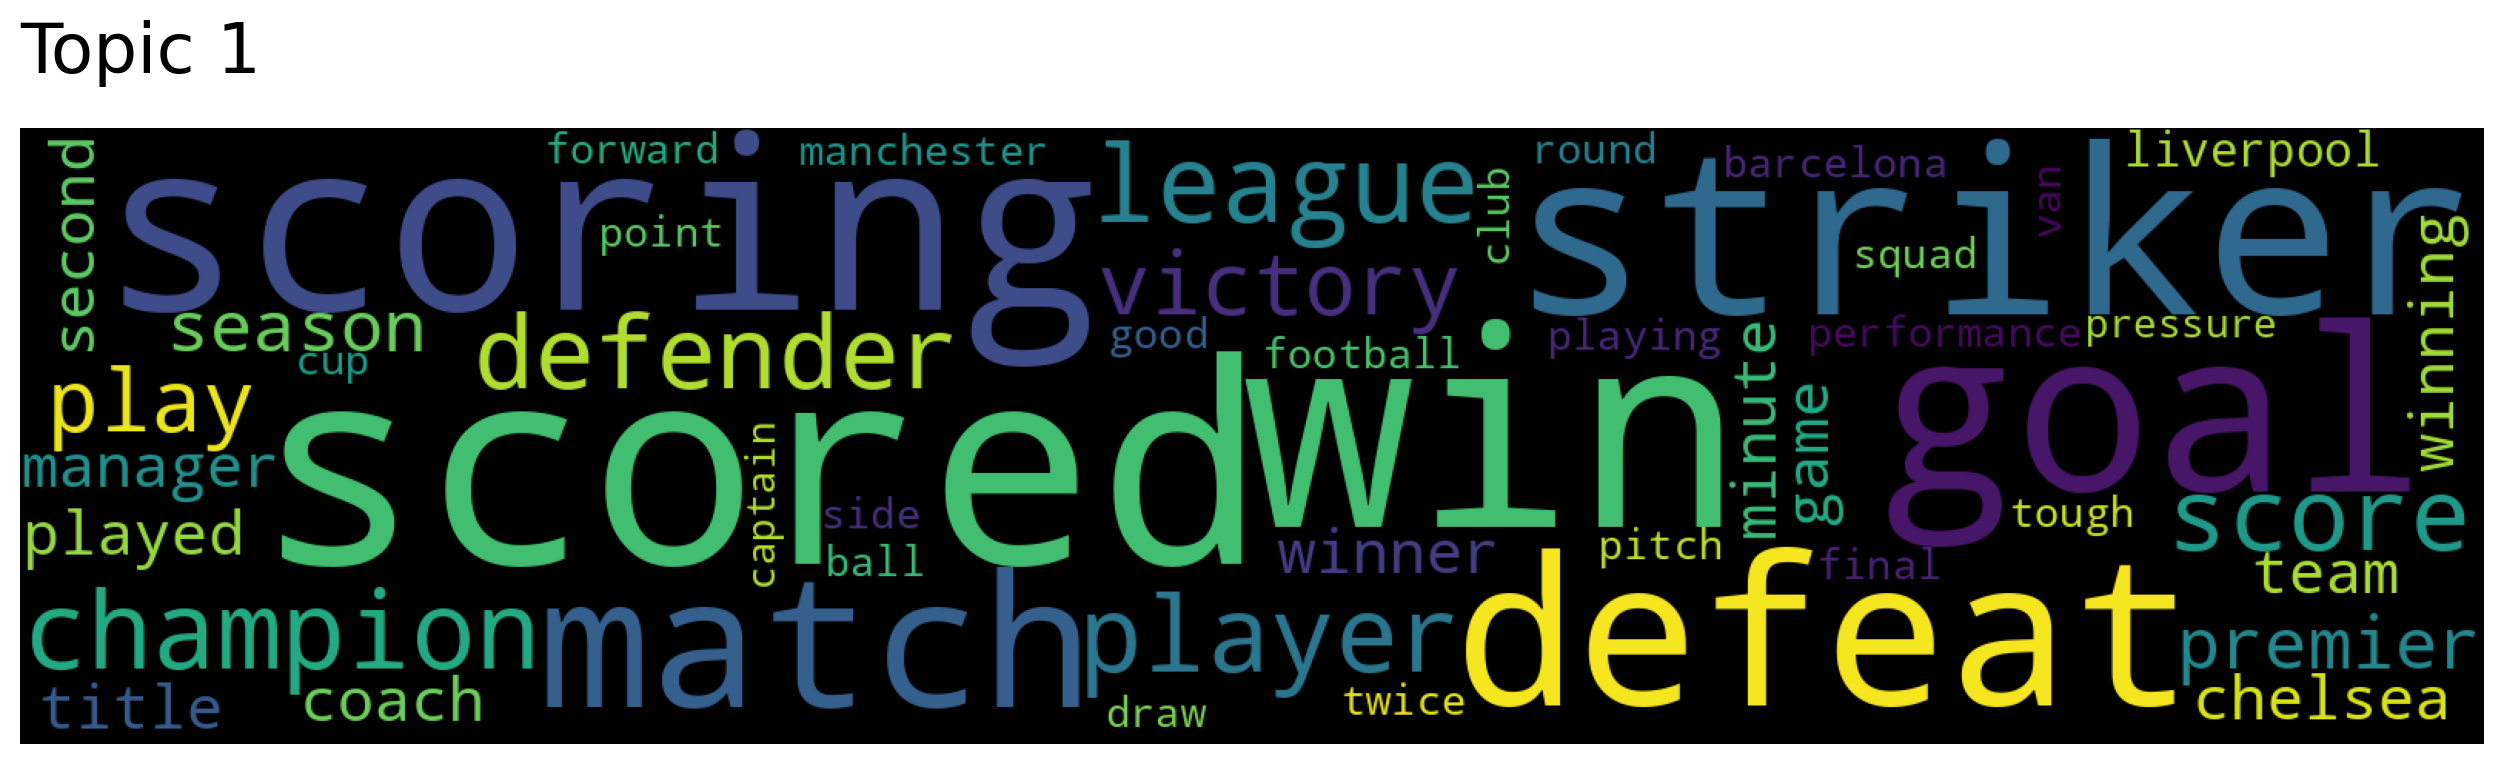

In [37]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["football"], num_topics=1)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

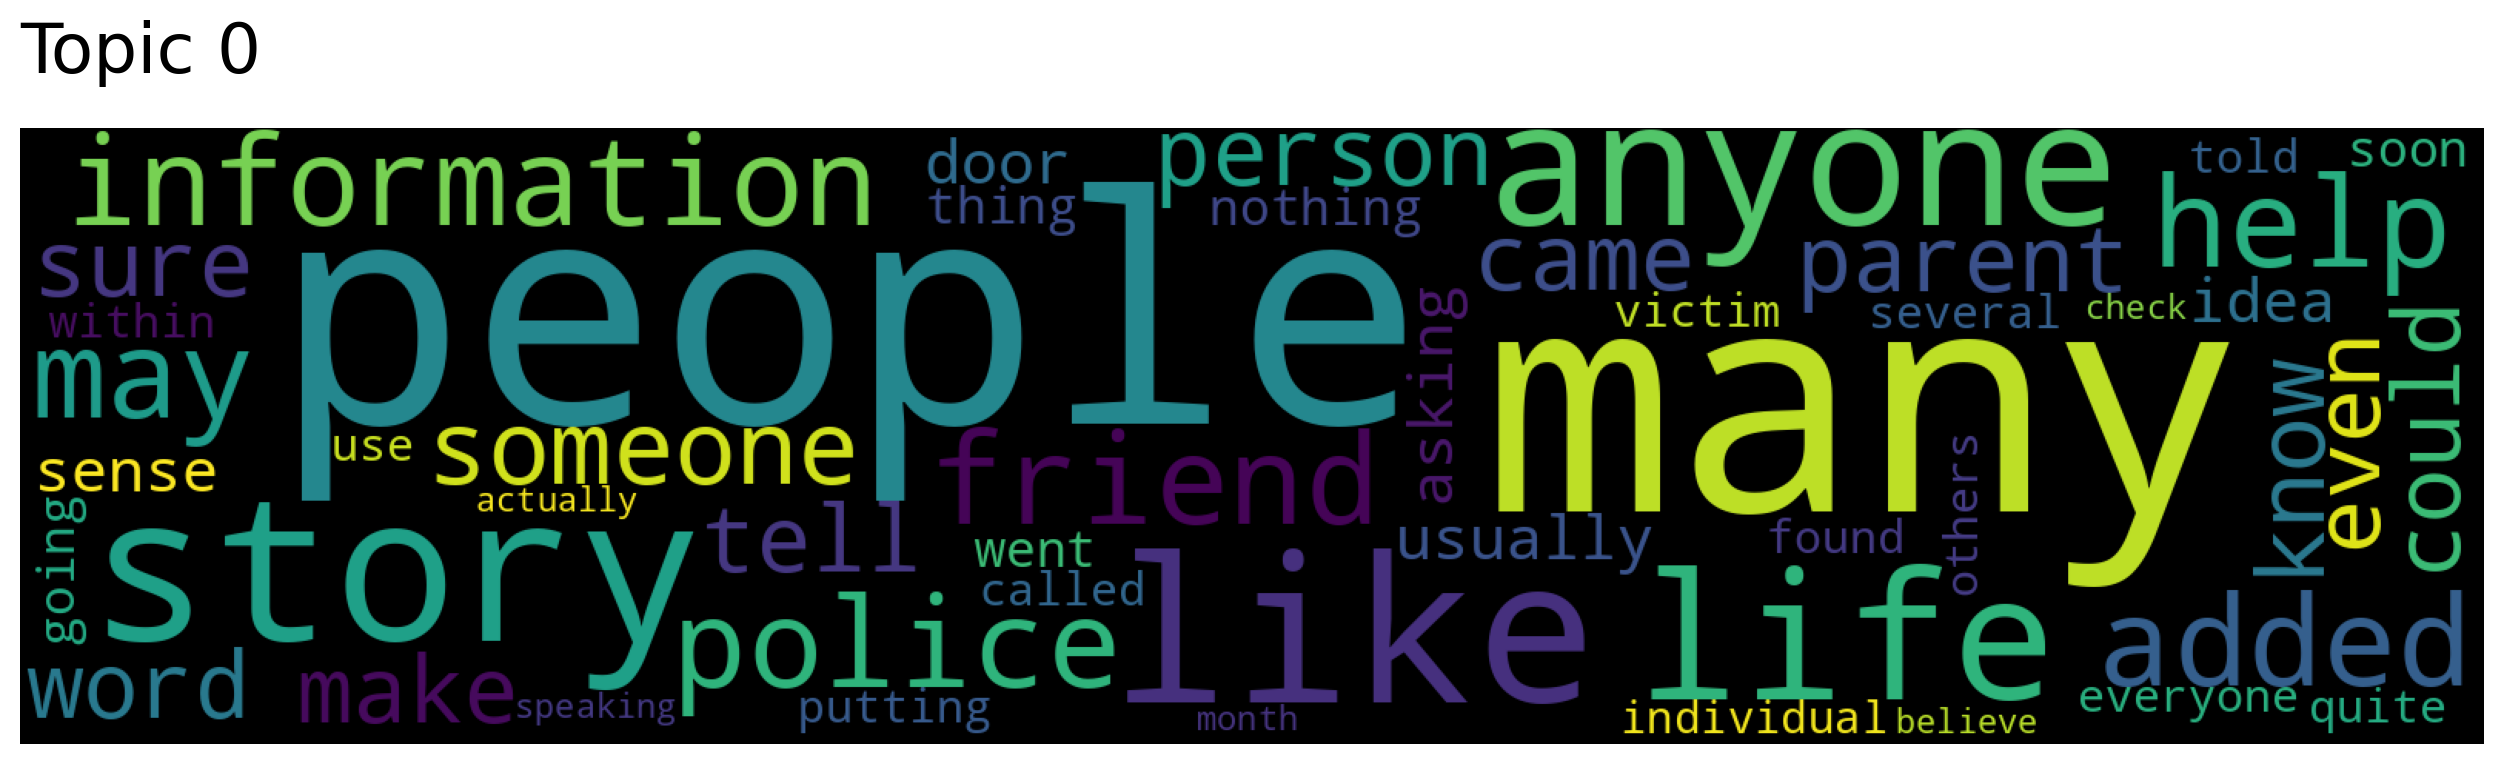

In [34]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["police"], num_topics=1)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

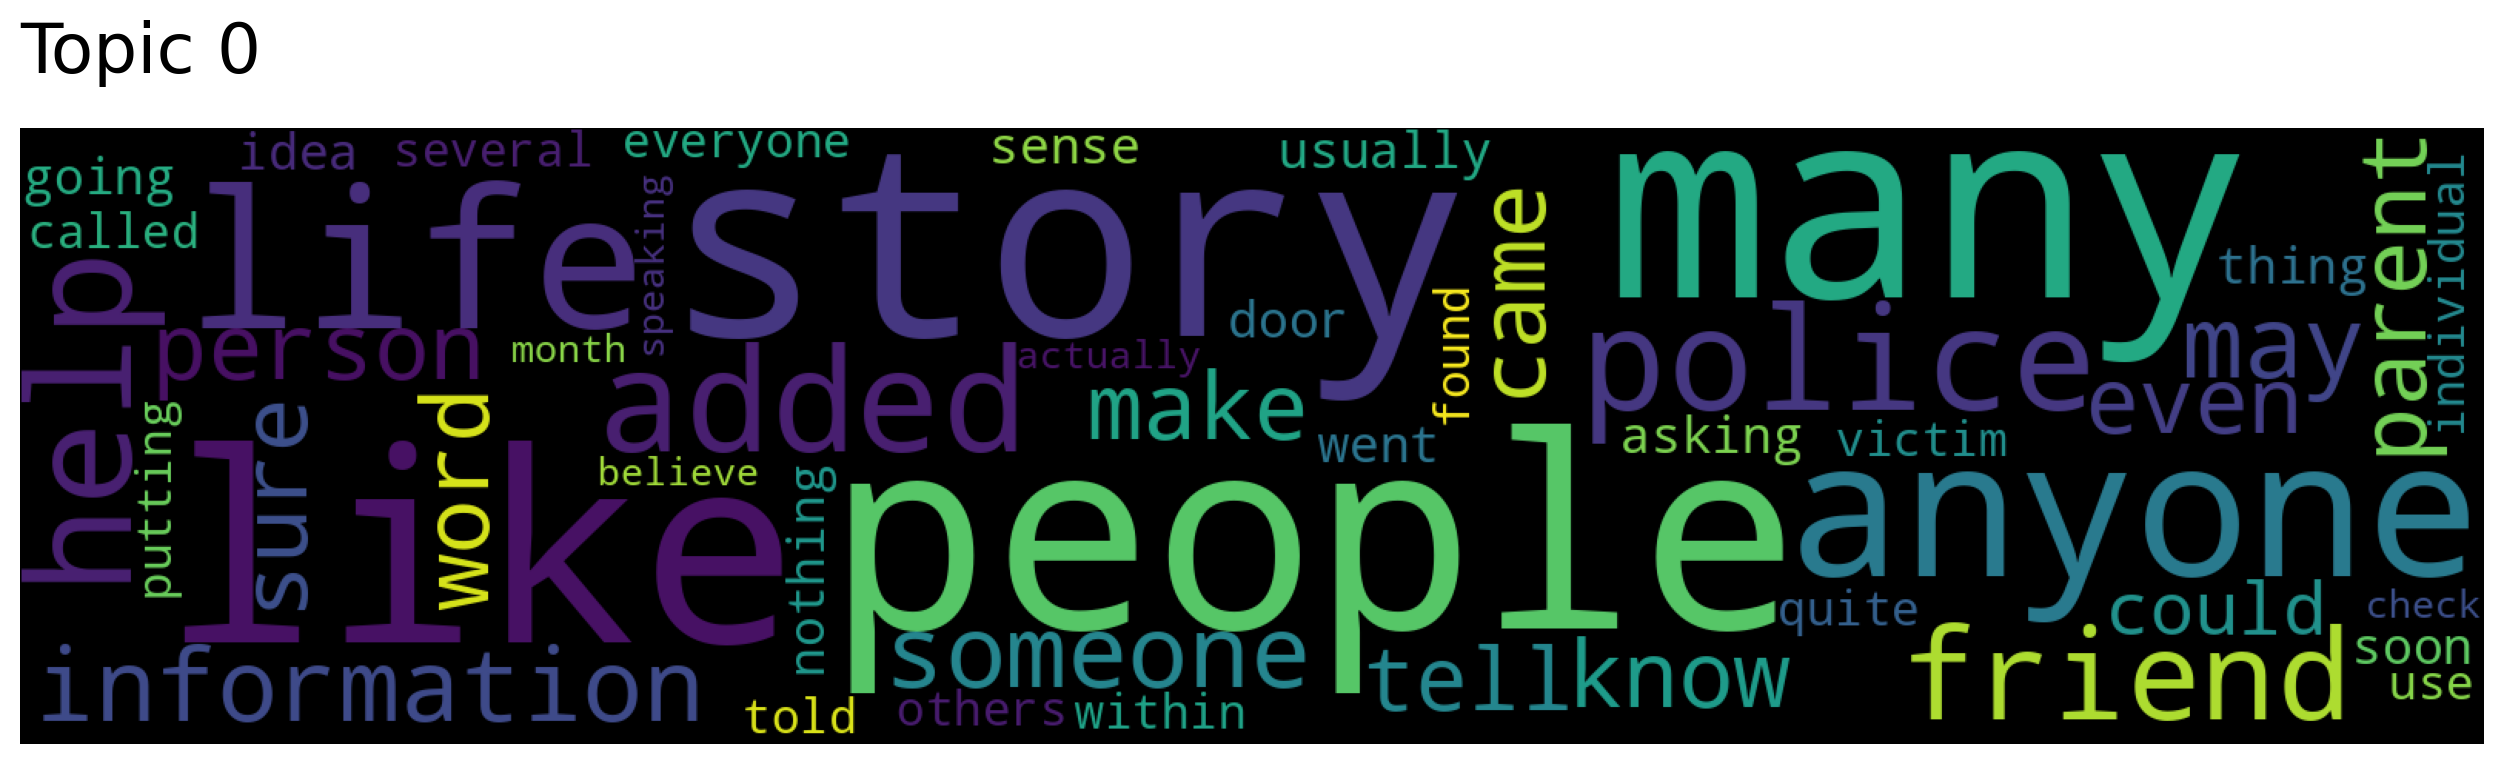

In [35]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["obama"], num_topics=1)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)